In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import requests
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from threading import Thread
from time import sleep

In [2]:
print(len(os.listdir('./tmp/PetImages/Cat/')))
print(len(os.listdir('./tmp/PetImages/Cat/')))

12501
12501


In [3]:
try:
    os.mkdir('./tmp/cats-v-dogs')
    os.mkdir('./tmp/cats-v-dogs/training')
    os.mkdir('./tmp/cats-v-dogs/testing')
    os.mkdir('./tmp/cats-v-dogs/training/cats')
    os.mkdir('./tmp/cats-v-dogs/training/dogs')
    os.mkdir('./tmp/cats-v-dogs/testing/cats')
    os.mkdir('./tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [4]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, do ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

CAT_SOURCE_DIR = './tmp/PetImages/Cat/'
TRAINING_CATS_DIR = './tmp/cats-v-dogs/training/cats/'
TESTING_CATS_DIR = './tmp/cats-v-dogs/testing/cats/'
DOG_SOURCE_DIR = './tmp/PetImages/Dog/'
TRAINING_DOGS_DIR = './tmp/cats-v-dogs/training/dogs/'
TESTING_DOGS_DIR = './tmp/cats-v-dogs/testing/dogs/'

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, do ignoring.
11702.jpg is zero length, do ignoring.


In [6]:
print(len(os.listdir('./tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('./tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('./tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('./tmp/cats-v-dogs/testing/dogs/')))

12499
12378
4347
2378


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

TRAINING_DIR = './tmp/cats-v-dogs/training'
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=250, class_mode='binary', target_size=(150, 150))

VALIDATION_DIR = './tmp/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR, batch_size=250, class_mode='binary', target_size=(150, 150))
# Expected Output
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 24875 images belonging to 2 classes.
Found 6724 images belonging to 2 classes.


In [8]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=15, steps_per_epoch=90, validation_data=validation_generator, validation_steps=6)


Epoch 1/15
23/90 [======>.......................] - ETA: 3:45 - loss: 0.6952 - acc: 0.5278

C:\Users\xgabr\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


90/90 [==============================] - 352s 4s/step - loss: 0.6634 - acc: 0.5982 - val_loss: 0.6580 - val_acc: 0.6080
Epoch 2/15
90/90 [==============================] - 330s 4s/step - loss: 0.5631 - acc: 0.7057 - val_loss: 0.7330 - val_acc: 0.5967
Epoch 3/15
90/90 [==============================] - 280s 3s/step - loss: 0.5224 - acc: 0.7386 - val_loss: 0.4536 - val_acc: 0.7927
Epoch 4/15
90/90 [==============================] - 281s 3s/step - loss: 0.4881 - acc: 0.7605 - val_loss: 0.4285 - val_acc: 0.8107
Epoch 5/15
90/90 [==============================] - 269s 3s/step - loss: 0.4589 - acc: 0.7815 - val_loss: 0.4046 - val_acc: 0.8300
Epoch 6/15
90/90 [==============================] - 268s 3s/step - loss: 0.4257 - acc: 0.8039 - val_loss: 0.4981 - val_acc: 0.7620
Epoch 7/15
90/90 [==============================] - 287s 3s/step - loss: 0.4033 - acc: 0.8189 - val_loss: 0.4196 - val_acc: 0.8013
Epoch 8/15
90/90 [==============================] - 348s 4s/step - loss: 0.3843 - acc: 0.8239 

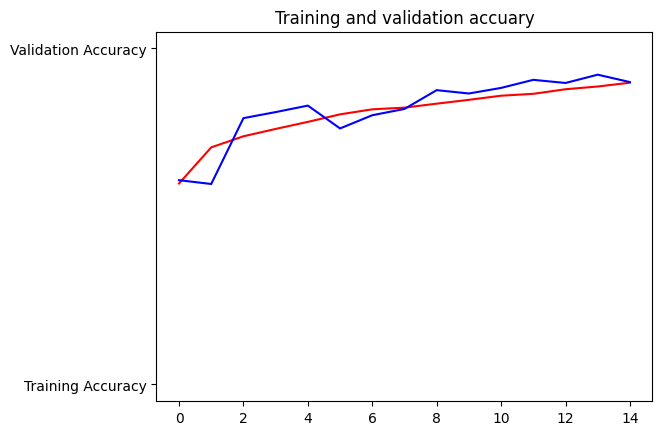

<Figure size 640x480 with 0 Axes>

In [9]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuary')
plt.figure()
plt.show()